In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../'))
import functions_ml as fml
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Load your data
results = pd.read_csv('../datasets/instances_results.csv')
features = pd.read_csv('../datasets/multi_plant_instance_features.csv')

# Initialize an empty DataFrame to store the value counts for each limit
final_df = pd.DataFrame()

# List of limits to test
limits = [0, 0.01/100, 0.05/100, 0.1/100, 0.5/100, 1/100, 5/100]

for limit in limits:
    # Assuming fml.create_dataset and fml.create_target are functions from a specific library you're using
    dataset = fml.create_dataset(dataset_features=features, dataset_results=results)
    dataset = fml.create_target(data=dataset, tolerance=limit, binary_classification=False)

    # Count the target values
    value_counts = dataset['TARGET'].value_counts().sort_index()

    # Add the counts to the final DataFrame
    final_df[f'Limit_{limit}'] = value_counts

# Fill NaN values with 0 if any method does not appear in some limit configurations
final_df.fillna(0, inplace=True)

# Save or display the final DataFrame
final_df = final_df.reset_index()
final_df.columns = ['Method', '0', '0,01%', '0,05%', '0,1%', '0,5%', '1%', '5%']
final_df.loc[final_df['Method'] == 'RF_T_0', 'Method'] = 'Gurobi'
final_df.to_csv('resultados_alvo.csv', index=False)
final_df

,Method,0,"0,01%","0,05%","0,1%","0,5%",1%,5%
0,RF_1_0,47,51,125,174,241,270.0,364.0
1,RF_2_0,50,87,125,127,127,148.0,127.0
2,RF_2_1,29,42,43,37,38,32.0,11.0
3,RF_3_0,29,52,47,32,41,32.0,36.0
4,RF_3_1,38,47,33,35,20,39.0,6.0
5,RF_3_2,16,18,7,12,25,8.0,0.0
6,RF_4_0,17,28,18,14,14,11.0,10.0
7,RF_4_1,30,39,42,34,22,14.0,4.0
8,RF_4_2,32,35,27,20,15,2.0,0.0
9,RF_4_3,16,15,13,6,1,3.0,0.0


In [7]:
final_df = final_df.set_index('Method')

# Generalize the index for grouping
final_df.index = final_df.index.str.replace(r'_\d+$', '_X', regex=True)

# Group by the new index and sum the groups
grouped_df = final_df.groupby(final_df.index).sum()

# This will sum all 'RF_6_X' into 'RF_6', 'RF_4_X' into 'RF_4', etc.
grouped_df

,0,"0,01%","0,05%","0,1%","0,5%",1%,5%
Method,,,,,,,
Gurobi,163,55,35,26,13,13.0,14.0
RF_1_X,47,51,125,174,241,270.0,364.0
RF_2_X,79,129,168,164,165,180.0,138.0
RF_3_X,83,117,87,79,86,79.0,42.0
RF_4_X,95,117,100,74,52,30.0,14.0
RF_6_X,131,129,83,81,41,26.0,26.0


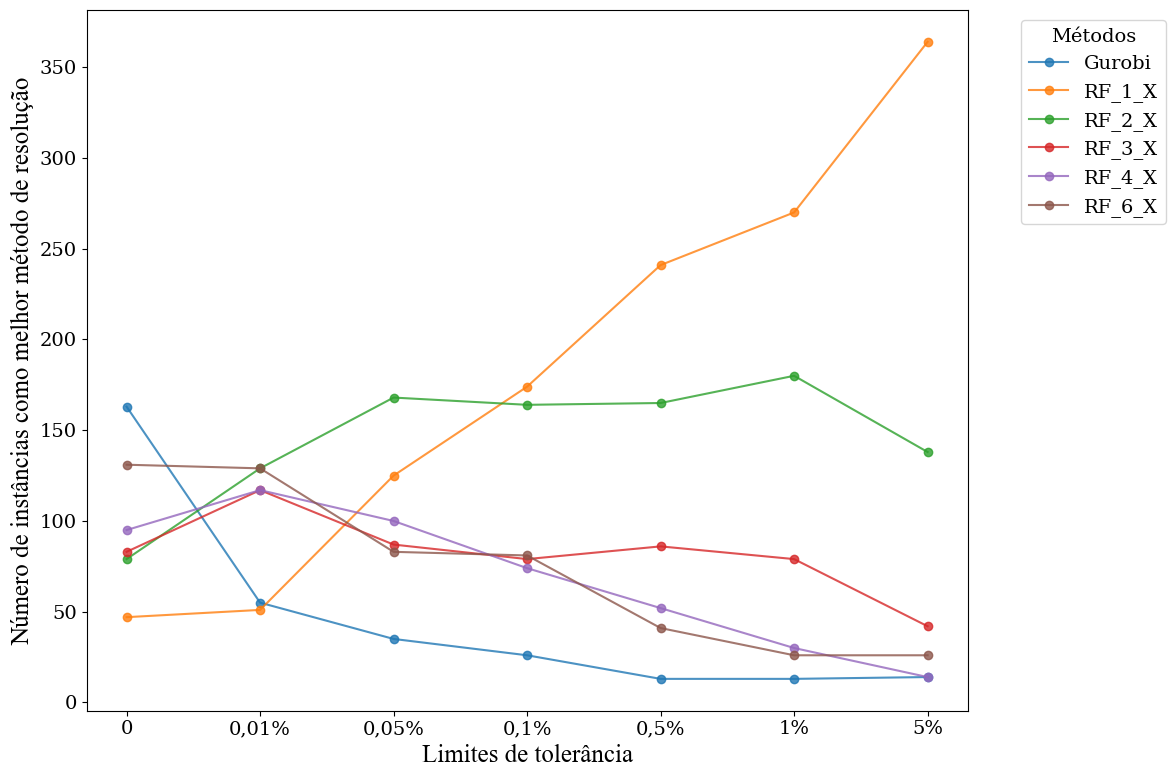

In [ ]:
import matplotlib.pyplot as plt

# plot_df = final_df[final_df.index.isin(['Gurobi']) | final_df.index.str.match(r'RF_\d_0')]
plot_df = grouped_df

# Ensure column names (tolerance limits) are unique and correctly ordered
columns_ordered = ['0', '0,01%', '0,05%', '0,1%', '0,5%', '1%', '5%']

plt.rcParams['font.family'] = 'serif'  # Set the font family to 'serif', you can change it to 'Arial', 'Times New Roman', etc.
plt.rcParams['font.size'] = 14  # Set the global font size

# Plotting the data with correct alignment and unique tolerance limits
plt.figure(figsize=(12, 8))
for method in plot_df.index:
    # Select the columns in the defined order, avoiding any misalignment
    plt.plot(columns_ordered, plot_df.loc[method, columns_ordered], marker='o', label=method, alpha=0.8)

# plt.title('Escolha de métodos para diferentes limites de tolerância')
plt.xlabel('Limite de tolerância', fontsize=18, fontname='Times New Roman')
plt.ylabel('Número de instâncias como melhor método de resolução', fontsize=18, fontname='Times New Roman')
plt.xticks(rotation=0)  # Ensures the labels are readable
plt.legend(title='Métodos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.savefig('fig_resultados_tolerancia.png', dpi=300, bbox_inches='tight')
plt.show()